In [1]:
from ncf_model import NCFModel

import sys
from pprint import pprint
sys.path.append("../dataset")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer

In [2]:
data_loader = DataLoader()
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, score_normalizers = [GaussianNormalizer(2.0, 1.0)], game_embeddings = ['name', 'genres'], user_game_edge_embeddings = ['playtime_forever'])
network = data_loader.get_full_network()
data_loader.load_random_train_test_network(network=network, train_percentage=0.8, test_percentage=0.2, seed=0)

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 20090365


Training: 100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


[(31270, 0.9994812607765198),
 (1172470, 0.9993239641189575),
 (2491360, 0.9993106126785278),
 (434520, 0.9993014335632324),
 (550, 0.9992807507514954),
 (1065950, 0.9992231130599976),
 (2334130, 0.9991757273674011),
 (590970, 0.9991017580032349),
 (1304550, 0.999085545539856),
 (271590, 0.9990853071212769)]
[(1205900, 0.9407382607460022),
 (785850, 0.9403699636459351),
 (1604350, 0.9401347637176514),
 (606710, 0.9393925070762634),
 (725280, 0.9390134215354919),
 (2385320, 0.9368767738342285),
 (931000, 0.9332489371299744),
 (680690, 0.9300458431243896),
 (798290, 0.9271241426467896),
 (451350, 0.923220157623291)]
[(237310, 0.999401330947876),
 (339580, 0.9993560910224915),
 (1186740, 0.9992375373840332),
 (1304550, 0.9992066025733948),
 (436140, 0.999186098575592),
 (1164050, 0.9991852641105652),
 (346110, 0.9991710186004639),
 (312540, 0.9991682767868042),
 (828900, 0.9991282820701599),
 (1225590, 0.999122679233551)]
[(891200, 0.9407094120979309),
 (355430, 0.9403032660484314),
 (394

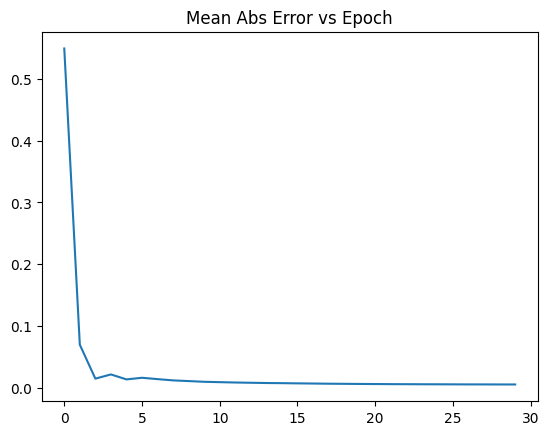

In [3]:
# ncf test
model = NCFModel(num_epochs = 30, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='ncf')
model.set_data_loader(data_loader)
model.train(debug=True)
# model.save('test_ncf_ncf', overwrite=True)
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[-10:])

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 1941401


Training: 100%|██████████| 30/30 [00:04<00:00,  6.38it/s]


0.882437527179718
0.8824370503425598
0.8824363946914673
0.8824375867843628
[(823470, 0.8824635148048401),
 (331470, 0.8824628591537476),
 (410980, 0.8824620842933655),
 (1520, 0.8824620842933655),
 (421700, 0.8824608325958252),
 (259940, 0.8824595212936401),
 (584640, 0.8824587464332581),
 (536750, 0.8824579119682312),
 (1449750, 0.8824576735496521),
 (1206700, 0.882457435131073)]
[(499420, 0.882414698600769),
 (908740, 0.8824142813682556),
 (548840, 0.8824137449264526),
 (1030830, 0.8824134469032288),
 (376520, 0.8824124336242676),
 (551100, 0.8824115991592407),
 (661680, 0.8824110627174377),
 (2020540, 0.8824109435081482),
 (409600, 0.8824089169502258),
 (617160, 0.8823964595794678)]
[(765100, 0.8824815154075623),
 (434510, 0.8824771642684937),
 (497700, 0.8824745416641235),
 (455970, 0.8824735283851624),
 (469610, 0.8824727535247803),
 (1393350, 0.882472574710846),
 (640210, 0.8824718594551086),
 (1225560, 0.8824693560600281),
 (553880, 0.8824688792228699),
 (461360, 0.8824685215950

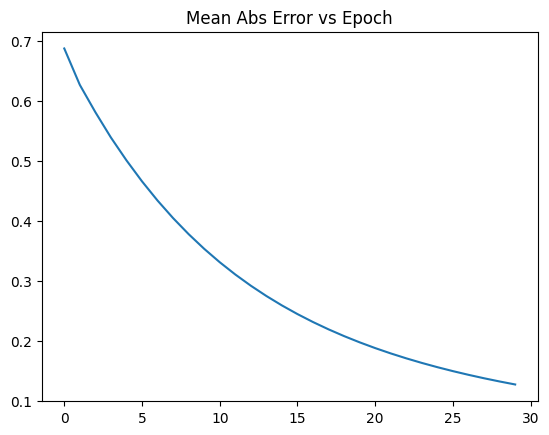

In [4]:
# gcf test
model = NCFModel(num_epochs = 30, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-2, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf')
model.set_data_loader(data_loader)
model.train(debug=True)
print(model.get_score_between_user_and_game(76561199583716145, 730))
print(model.get_score_between_user_and_game(76561199583716145, 578080))
print(model.get_score_between_user_and_game(76561199583716145, 1677740))
print(model.get_score_between_user_and_game(76561199583716145, 760160))
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[-10:])

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 10383365


Training: 100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


[(845880, 0.9997618794441223),
 (578080, 0.9997604489326477),
 (538590, 0.9997383952140808),
 (597240, 0.9996639490127563),
 (892310, 0.9996482133865356),
 (2626940, 0.9996448755264282),
 (80340, 0.9996306896209717),
 (781670, 0.999629020690918),
 (1299120, 0.9996147155761719),
 (916050, 0.999603807926178)]
[(312280, 0.9599878191947937),
 (585880, 0.9586140513420105),
 (858810, 0.9569116234779358),
 (2085970, 0.9564993381500244),
 (1083300, 0.9500437378883362),
 (1171140, 0.9460419416427612),
 (507210, 0.9452685713768005),
 (861270, 0.9449445009231567),
 (345080, 0.9428426623344421),
 (521130, 0.9328967928886414)]
[(308330, 0.9996874332427979),
 (1684510, 0.9996058344841003),
 (202750, 0.9995904564857483),
 (550, 0.9995878338813782),
 (1185520, 0.9995418787002563),
 (596200, 0.999531626701355),
 (521630, 0.9994661211967468),
 (281820, 0.9994511008262634),
 (1203220, 0.9994497895240784),
 (1933740, 0.9994485974311829)]
[(1495080, 0.950393557548523),
 (585880, 0.9487406015396118),
 (5110

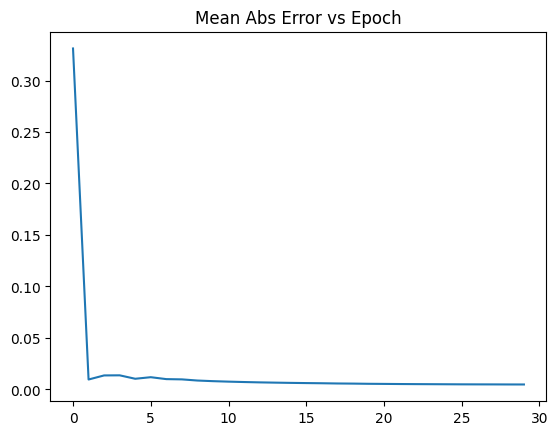

In [5]:
# mlp test
model = NCFModel(num_epochs = 30, embedding_size = 500, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [512, 256, 128], seed=0, model_type='mlp')
model.set_data_loader(data_loader)
model.train(debug=True)
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199583716145)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199600587957)[-10:])